# 유사도 분석

In [1]:
import pandas as pd
import numpy as np
import itertools
from konlpy.tag import Mecab
from Preprocess import load
from Preprocess.load import DataLoad
from Preprocess.text_preprocess import Preprocess

## Data Load

In [2]:
loader = DataLoad(
    tran_path="./Data/csv/sample_transcripts.csv",
    meta_path="./Data/csv/sample_videos.csv"
)

In [3]:
stopwords = DataLoad.load_stopwords()

## Data Preprocess

In [4]:
import re
def tokenizer(sentence, pos=['NP','NNG', 'NNP'], stopword=stopwords): 
    tokenized = Mecab().pos(sentence)
    tokens = [word for word, tag in tokenized if tag in ['NP','NNG', 'NNP'] and len(word) > 1]
    tokens = [word for word in tokens if word not in stopword]
    tokens = list(map(regex_preprocess, tokens))
    return tokens

def regex_preprocess(text):
    pattern = '[^ ㄱ-ㅣ가-힣]+'
    text = re.sub(pattern,'', text)
    text = re.sub("  ", " ", text)
    return text

In [5]:
import re
def tokenizer_morphs(sentence, stopword=stopwords): 
    tokenized = Mecab().morphs(sentence)
    tokens = [word for word in tokenized if len(word) > 1]
    tokens = [word for word in tokens if word not in stopword]
    tokens = list(map(regex_preprocess, tokens))
    return tokens

def regex_preprocess(text):
    pattern = '[^ ㄱ-ㅣ가-힣]+'
    text = re.sub(pattern,'', text)
    text = re.sub("  ", " ", text)
    return text

In [6]:
preprocessor = Preprocess(
    stopwords=stopwords
)

In [7]:
texts_dict_popular, texts_dict_unpopular = loader.get_data_set()

In [10]:
popular_clean_dict = preprocessor.get_cleaned_dict(texts_dict_popular)

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/91 [00:00<?, ?it/s]

  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/73 [00:00<?, ?it/s]

  0%|          | 0/389 [00:00<?, ?it/s]

  0%|          | 0/151 [00:00<?, ?it/s]

  0%|          | 0/346 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/82 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/260 [00:00<?, ?it/s]

  0%|          | 0/527 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/820 [00:00<?, ?it/s]

  0%|          | 0/205 [00:00<?, ?it/s]

  0%|          | 0/151 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

In [11]:
unpopular_clean_dict = preprocessor.get_cleaned_dict(texts_dict_unpopular)

  0%|          | 0/166 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/104 [00:00<?, ?it/s]

  0%|          | 0/290 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/181 [00:00<?, ?it/s]

  0%|          | 0/318 [00:00<?, ?it/s]

  0%|          | 0/377 [00:00<?, ?it/s]

  0%|          | 0/444 [00:00<?, ?it/s]

  0%|          | 0/181 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/108 [00:00<?, ?it/s]

  0%|          | 0/362 [00:00<?, ?it/s]

  0%|          | 0/185 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

  0%|          | 0/365 [00:00<?, ?it/s]

  0%|          | 0/105 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/92 [00:00<?, ?it/s]

  0%|          | 0/108 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/168 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

In [17]:
popular_lec = [doc for doc in popular_clean_dict.values()]

In [18]:
popular_list = [" ".join(doc) for doc in popular_lec]

In [19]:
unpopular_lec = [doc for doc in unpopular_clean_dict.values()]

In [20]:
unpopular_list = [" ".join(doc) for doc in unpopular_lec]

In [21]:
text = popular_lec + unpopular_lec

In [22]:
texts = list(itertools.chain(*text))

## TF-IDF

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(min_df = 3, ngram_range=(1,5), tokenizer=tokenizer)
tfidf_vectorizer.fit(texts)


/Users/jylee/Desktop/GeniA_project/venv/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TfidfVectorizer(min_df=3, ngram_range=(1, 5),
                tokenizer=<function tokenizer at 0x292160160>)

In [24]:
popular_tfidf = tfidf_vectorizer.transform(popular_list).toarray()
unpopular_tfidf = tfidf_vectorizer.transform(unpopular_list).toarray()

In [25]:
from sklearn.metrics.pairwise import cosine_similarity

cos_sim = cosine_similarity(popular_tfidf, unpopular_tfidf)

In [26]:
cos_sim_df = pd.DataFrame(cos_sim)

<Axes: >

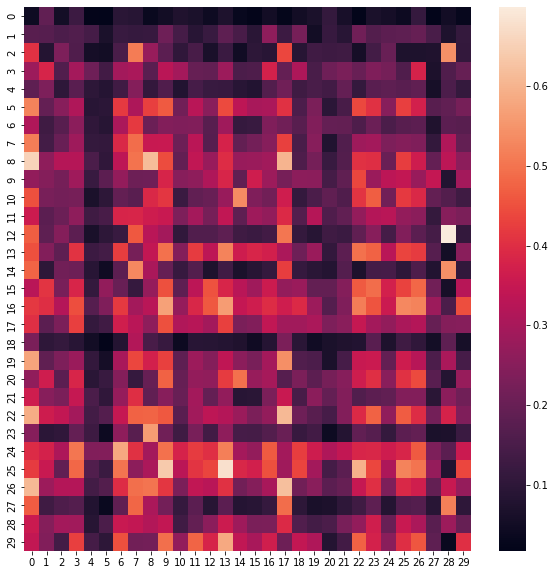

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(cos_sim_df)

In [28]:
cos_sim_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.043711,0.188591,0.052064,0.123931,0.020729,0.017246,0.091939,0.087855,0.035491,0.049428,...,0.111566,0.061528,0.017700,0.066725,0.055947,0.039101,0.115286,0.019805,0.051170,0.028791
1,0.172430,0.170496,0.154020,0.161174,0.140143,0.067460,0.119941,0.114999,0.118220,0.209797,...,0.116220,0.089767,0.212123,0.166037,0.180859,0.183743,0.197444,0.147934,0.071419,0.112127
2,0.403630,0.083606,0.233971,0.158611,0.057169,0.051102,0.149417,0.510203,0.272925,0.179368,...,0.126698,0.131309,0.055652,0.137510,0.200637,0.071896,0.070615,0.075563,0.543641,0.108085
3,0.281965,0.379656,0.162528,0.295875,0.210788,0.135226,0.292344,0.303452,0.176018,0.329607,...,0.209338,0.228977,0.199875,0.237681,0.220772,0.159156,0.378038,0.069177,0.159813,0.196535
4,0.185001,0.234540,0.100918,0.176968,0.097253,0.085765,0.133302,0.244532,0.108872,0.160631,...,0.136801,0.193139,0.110726,0.175469,0.182854,0.175702,0.185027,0.057482,0.155077,0.112021
5,0.521797,0.194557,0.251048,0.311521,0.090687,0.096105,0.419177,0.309536,0.426209,0.464148,...,0.094758,0.146251,0.439552,0.404989,0.248952,0.426090,0.372864,0.172740,0.190300,0.222376
6,0.314661,0.130923,0.173461,0.254958,0.103049,0.089091,0.306669,0.416856,0.204750,0.241848,...,0.195259,0.192837,0.157575,0.205061,0.152702,0.172926,0.180882,0.073477,0.178047,0.174073
7,0.514812,0.139432,0.199756,0.284486,0.110890,0.108187,0.387419,0.491014,0.350972,0.354764,...,0.077744,0.162213,0.283793,0.293634,0.234213,0.245586,0.238228,0.108572,0.313964,0.191661
8,0.656226,0.261562,0.322183,0.321841,0.150890,0.104133,0.336075,0.499101,0.615185,0.445847,...,0.119464,0.164536,0.403724,0.400368,0.203524,0.424042,0.361655,0.195628,0.332765,0.258972
9,0.264938,0.245351,0.221549,0.288457,0.119968,0.180588,0.268084,0.208235,0.209799,0.381153,...,0.139991,0.185932,0.437449,0.280461,0.333539,0.342499,0.277234,0.345839,0.079430,0.292700


In [467]:
print(f"TF-IDF 변환 후 유사도 비교 시, 유사도의 평균은 {round(np.mean(cos_sim_df.values), 3)} 입니다.")

TF-IDF 변환 후 유사도 비교 시, 유사도의 평균은 0.247 입니다.


<Axes: >

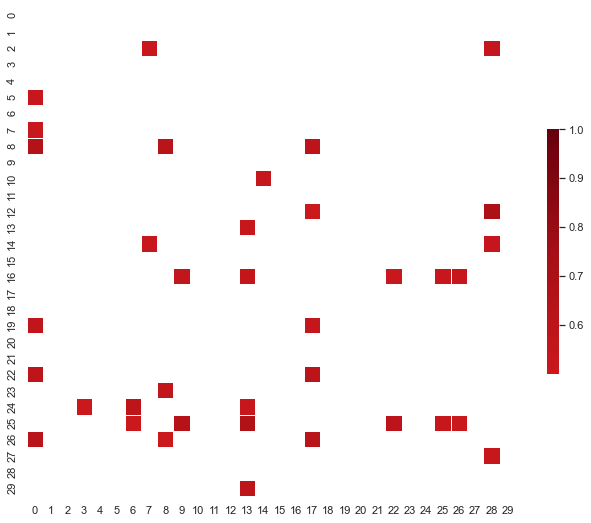

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")
corr = cos_sim_df
mask = corr.abs() < 0.5
f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, mask=mask, cmap="Reds", vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

- "유사도가 0.5 이하인 것"으로 masking 하였을 때, 총 90개의 유사도 중 37개 만이 유사도가 0.5 이상일 것으로 나타났다 (41.1%)
- 이는 약 60% 정도 유사도가 절반 이하로 나타난 것을 볼 수 있으므로, 인기 강좌와 비인기 강좌에서 나타난 중요 단어들을 비교하였을 때, 꽤 유사하지 않다는 것을 알 수 있다.
- 어떠한 단어들이 차이를 만들었는지는 정확히 알 수 없으나, 유사성이 낮다고 보여진다

In [31]:
# key : index / value : word
## Get keyword
invert_index_vectorizer = {v: k for k, v in tfidf_vectorizer.vocabulary_.items()}

po_keyword_list = list()
unpo_keyword_list = list()
for idx in range(len(popular_tfidf)):
    po_keywords_idx = [i for i in np.argsort(popular_tfidf[idx])[-5:]]
    unpo_keywords_idx = [i for i in np.argsort(unpopular_tfidf[idx])[-5:]]
    po_keywords = [invert_index_vectorizer[index] for index in po_keywords_idx]
    unpo_keywords = [invert_index_vectorizer[index] for index in unpo_keywords_idx]
    po_keyword_list.append(po_keywords)
    unpo_keyword_list.append(unpo_keywords)


In [150]:
po_keyword_list[:5]

[['나머지', '적용', '분수', '반복', '소수'],
 ['기본 정리', '함수', '방정식', '반지름', '복소수'],
 ['약수', '선생', '전개', '공통', '인수'],
 ['시기', '방정식 방정식', '내용', '문제', '방정식'],
 ['최고 개수', '최고', '정수', '개수', '약수']]

In [151]:
unpo_keyword_list[:5]

[['플러스', '분해', '인수 분해', '인수', '제곱'],
 ['방법', '제곱', '개수', '공식', '방정식'],
 ['제곱', '분해', '숫자', '공식', '표현'],
 ['제곱', '과정', '계산', '플러스마이너스', '플러스'],
 ['경계', '범위', '판별', '부등식', '그래프']]

---
## Doc2Vec

In [468]:
from gensim.models.doc2vec import TaggedDocument
from tqdm.notebook import tqdm
from gensim.models import doc2vec


In [229]:
popular_doc_df = pd.DataFrame({"text" : popular_list})
unpopular_doc_df = pd.DataFrame({"text" : unpopular_list})

total_doc_df = pd.concat([popular_doc_df, unpopular_doc_df], ignore_index=True)

In [232]:
total_doc_df["tag"] = [f"인기강좌{i}" for i in range(1,31)] + [f"비인기강좌{i}" for i in range(1,31)]

In [233]:
total_doc_df.head()

,text,tag
0,안녕하세요 음악 오늘은 분 술에 선수로 따 초만에 닦은 다음 법 음악 자아 이거 폼...,인기강좌1
1,여러분들 허수 아이에 대해 처음 접할 때 반감이 들진 않으셨나요의 루트를 씌워서 아...,인기강좌2
2,자 우리 오늘은요 대망의 인수분해에 대해서 배워보도록 할 겁니다 어이 제법 인수 분...,인기강좌3
3,우리가 드디어 이차방정식 파트로 넘어왔습니다 어 어 어 차 언정 씩 불줄 알아 차 ...,인기강좌4
4,이 음악 우리가 학교 수학에서 배우는 방정식 뜰은 대 개의 정수를 개수로 갖는다 음...,인기강좌5


In [234]:
total_doc_df.tail()

,text,tag
55,학년 우리 지난 시간에 완전제곱식을 이용한 차 방정식이 풀이에 대해서 했던 것 기억...,비인기강좌26
56,이제부터 이 타방 경숙의 근의 공식을 유도해 보겠습니다 여기 첫 번째 박수를 보시면...,비인기강좌27
57,쪽박 수는 루트 계수를 알면 값을 바르고 할 수 있지 그럼 점을 편리하지만 인수분...,비인기강좌28
58,인수가 아닌 것을 고르는 것에 대한 문제를 선생님이 초등학교 이런 것부터 고등학교 ...,비인기강좌29
59,음악 현재 어떤 그랬냐 네 여러분 했잖아요 그래서의 제곱 플러스 플러스 컬 용이라는...,비인기강좌30


In [235]:
tagged_corpus_list = []

for index, row in tqdm(total_doc_df.iterrows(), total=len(total_doc_df)):
  text = row['text']
  tag = row['tag']
  tagged_corpus_list.append(TaggedDocument(tags=[tag], words=tokenizer_morphs(text)))

print('문서의 수 :', len(tagged_corpus_list))

  0%|          | 0/60 [00:00<?, ?it/s]

문서의 수 : 60


In [238]:
model = doc2vec.Doc2Vec(vector_size=300, alpha=0.025, min_alpha=0.025, workers=8, window=8)


model.build_vocab(tagged_corpus_list)
model.train(tagged_corpus_list, total_examples=model.corpus_count, epochs=50)

# 모델 저장
#model.save('dart.doc2vec')

In [239]:
# 인기강좌/비인기강좌 유사강좌 TOP10 해당 강좌 비율
rates_po = []
for i in range(1, 31):    
    rates_po.append(len([k for k , v in model.dv.most_similar(f'인기강좌{i}') if "비인기강좌" not in k])/10)

rates_unpo = []
for i in range(1, 31):    
    rates_unpo.append(len([k for k , v in model.dv.most_similar(f'비인기강좌{i}') if "비인기강좌" in k])/10)

In [244]:
print(rates_po)

[0.5, 0.3, 0.9, 0.8, 0.5, 0.9, 0.7, 0.7, 0.7, 0.5, 0.9, 0.8, 0.7, 0.6, 0.9, 0.5, 0.7, 0.7, 0.3, 1.0, 0.7, 0.8, 0.9, 0.6, 0.4, 0.3, 0.7, 0.7, 0.8, 0.1]


In [246]:
print(rates_unpo)

[0.4, 0.5, 0.8, 0.8, 0.5, 0.9, 0.7, 0.3, 0.5, 0.7, 0.6, 0.7, 0.8, 0.9, 0.6, 0.7, 0.8, 0.4, 0.9, 0.6, 0.9, 0.7, 0.9, 0.7, 0.6, 0.6, 0.5, 0.8, 0.4, 0.7]


In [247]:
print(f"인기 강좌 별 유사강의 TOP 10에서 '인기강좌'인 비율은 {round(np.mean(rates_po) ,4) * 100 }% 입니다")
print(f"비인기 강좌 별 유사강의 TOP 10에서 '비인기강좌'인 비율은 {round(np.mean(rates_unpo) ,4) * 100 }% 입니다")

인기 강좌 별 유사강의 TOP 10에서 '인기강좌'인 비율은 65.33% 입니다
비인기 강좌 별 유사강의 TOP 10에서 '비인기강좌'인 비율은 66.33% 입니다


<Axes: ylabel='Count'>

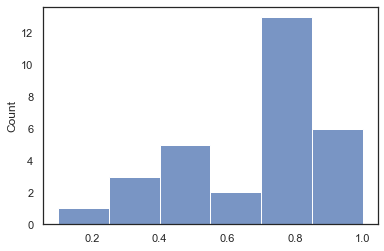

In [248]:
sns.histplot(rates_po)

<Axes: ylabel='Count'>

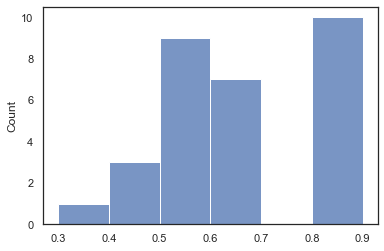

In [249]:
sns.histplot(rates_unpo)

## PCA & Clustering with Doc2Vec vectors

In [421]:
X = model.dv.vectors
feat_cols = ["Doc" + str(i) for i in range(X.shape[1])]


df = pd.DataFrame(X, columns=feat_cols)
df["label"] = ["0"]*30 + ["1"]*30

In [469]:
df.head()

,Doc0,Doc1,Doc2,Doc3,Doc4,Doc5,Doc6,Doc7,Doc8,Doc9,...,Doc295,Doc296,Doc297,Doc298,Doc299,label,cluster,pca-one,pca-two,pca-three
0,-1.952195,0.380601,-0.102142,1.290297,0.562699,-0.687940,0.580208,-0.665871,-0.430054,-0.717290,...,1.400331,0.560616,-0.232987,1.860074,0.491897,0,1,0.948347,-0.148272,1.921227
1,-1.139907,0.666331,0.328904,0.864200,0.304898,-1.336469,0.247577,2.916442,1.307425,-0.337284,...,2.411324,0.102433,-1.182298,1.550216,1.006834,0,0,-0.655068,4.411078,-5.468602
2,-1.336067,-0.766463,0.137012,1.240958,-0.024226,-0.664264,-1.061986,0.801755,-1.227017,1.559637,...,-0.877745,-1.656148,0.101914,1.522340,-1.901849,0,0,11.540278,-4.480030,2.952156
3,1.183488,1.113621,-1.606224,-1.698674,1.015270,-1.281838,0.468236,0.968071,-2.470955,-1.820251,...,0.818576,-0.306880,-1.830276,0.445450,-0.903202,0,0,7.445228,-9.779188,-1.119575
4,-0.001234,0.425993,-1.330735,1.478631,-0.925791,0.509399,0.494266,-0.401799,0.471907,1.352735,...,1.432906,-1.422248,-0.482569,-1.243447,0.120942,0,1,-1.798486,3.500247,1.599198


In [457]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=42)
pca_result = pca.fit_transform(df[feat_cols].values)

df["pca-one"] = pca_result[:, 0]
df["pca-two"] = pca_result[:, 1]
df["pca-three"] = pca_result[:, 2]

In [458]:
print("Explained variation per principle component: {}".format(pca.explained_variance_ratio_))

Explained variation per principle component: [0.0864774  0.06630778 0.05824457]


<Axes: xlabel='pca-one', ylabel='pca-two'>

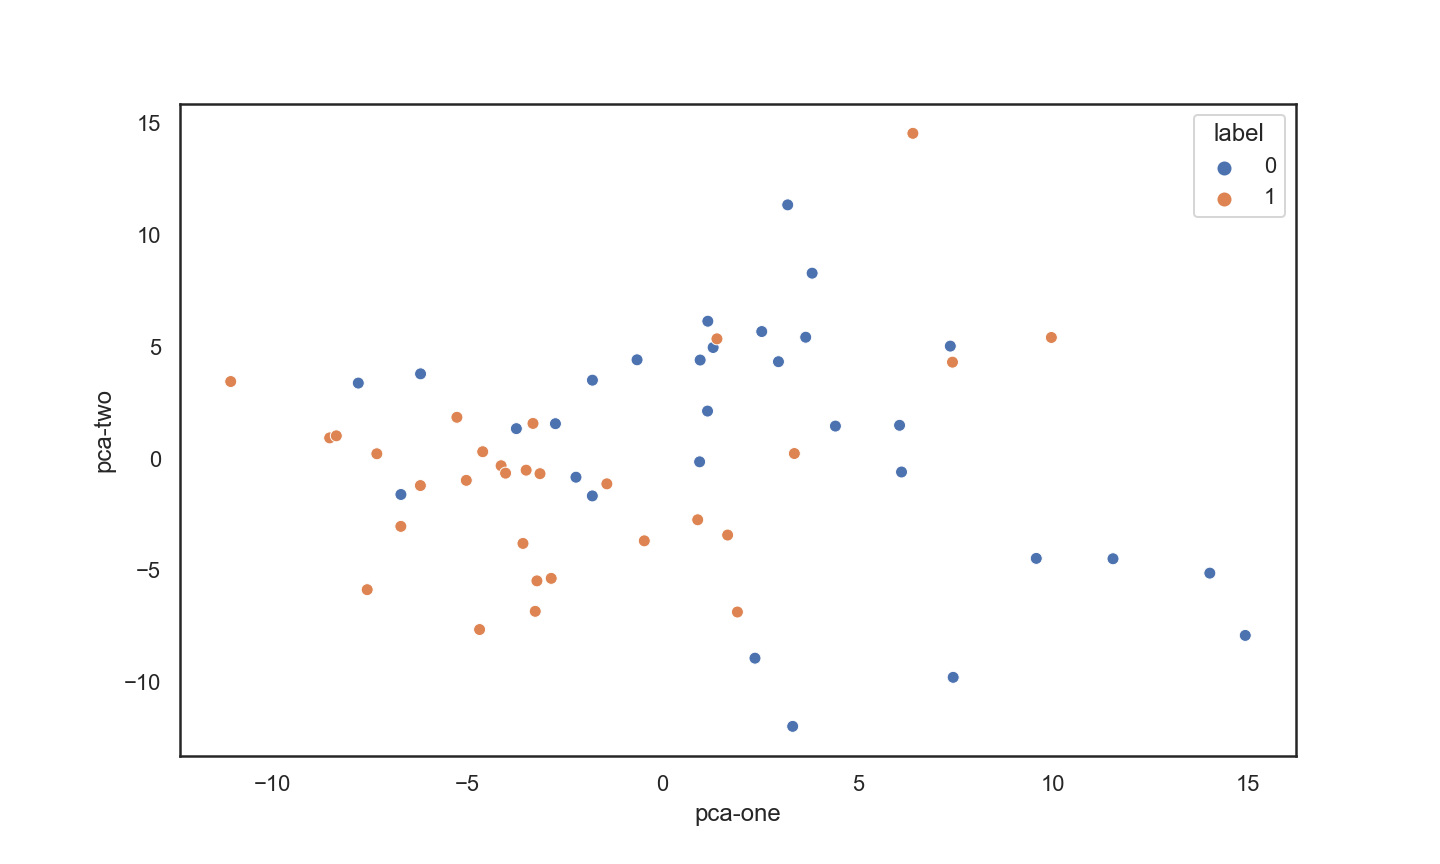

In [472]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="pca-one", y="pca-two", hue="label")
plt.title("PCA ")

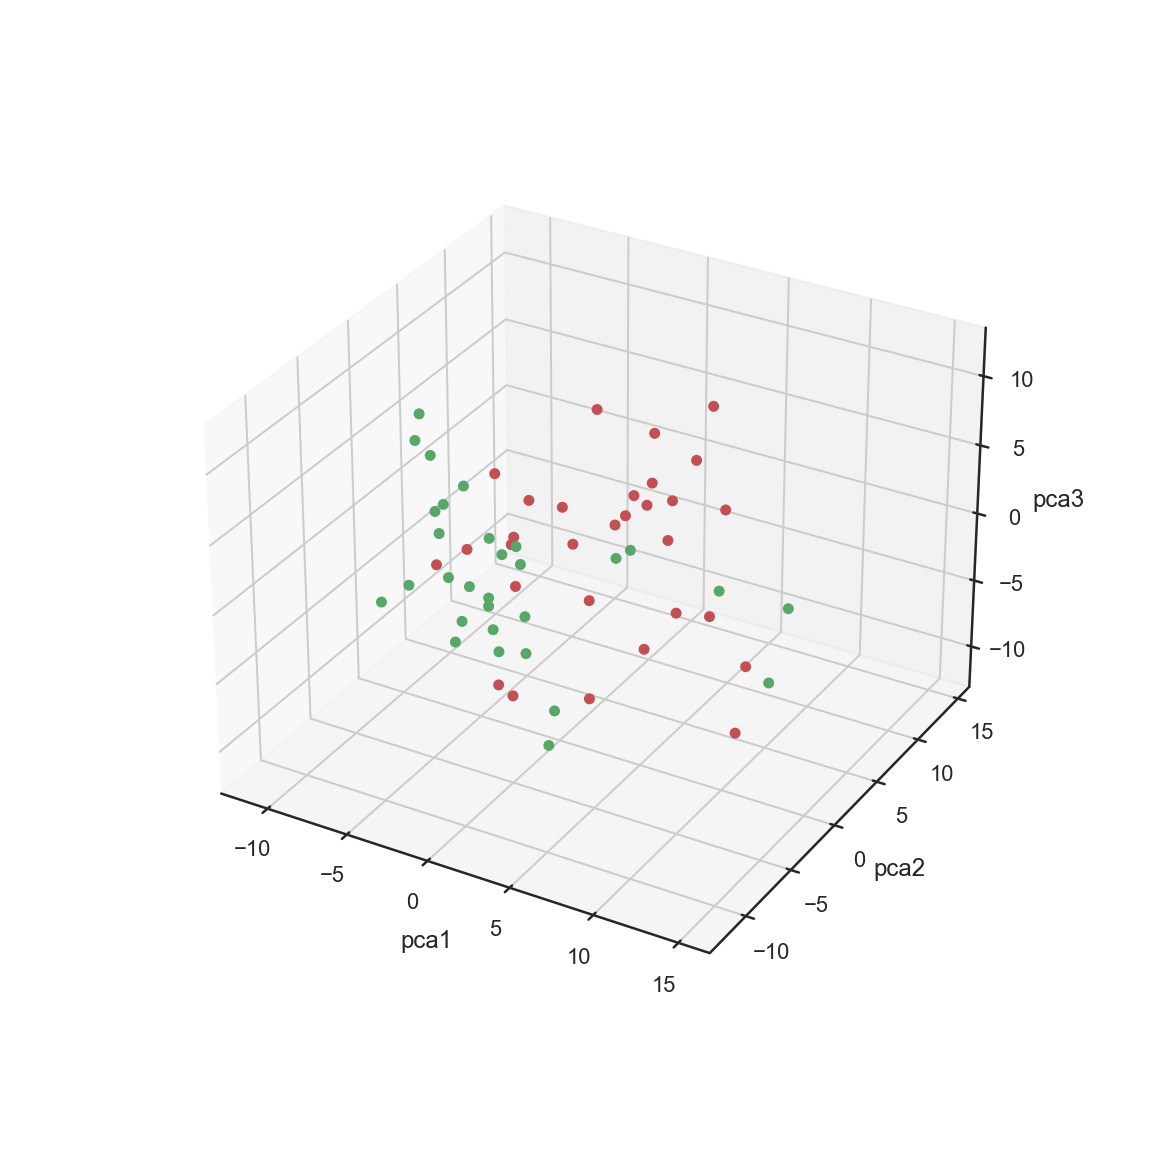

In [473]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(df['pca-one'],df['pca-two'],
           df['pca-three'],  alpha=1, label=df["label"], c=c)
ax.set_xlabel('pca1')
ax.set_ylabel('pca2')
ax.set_zlabel('pca3')
plt.show()

In [412]:
from sklearn.cluster import KMeans

In [413]:
kmeans = KMeans(init="k-means++", n_clusters=2, random_state=42)
y_pred = kmeans.fit_predict(df[["pca-one","pca-two"]])

/Users/jylee/Desktop/GeniA_project/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


In [448]:
df["cluster"] = y_pred

In [414]:
k_means_labels = kmeans.labels_
k_means_cluster_centers = kmeans.cluster_centers_
kmeans.cluster_centers_

array([[ 5.4247093,  2.6035593],
       [-3.6164715, -1.7357066]], dtype=float32)

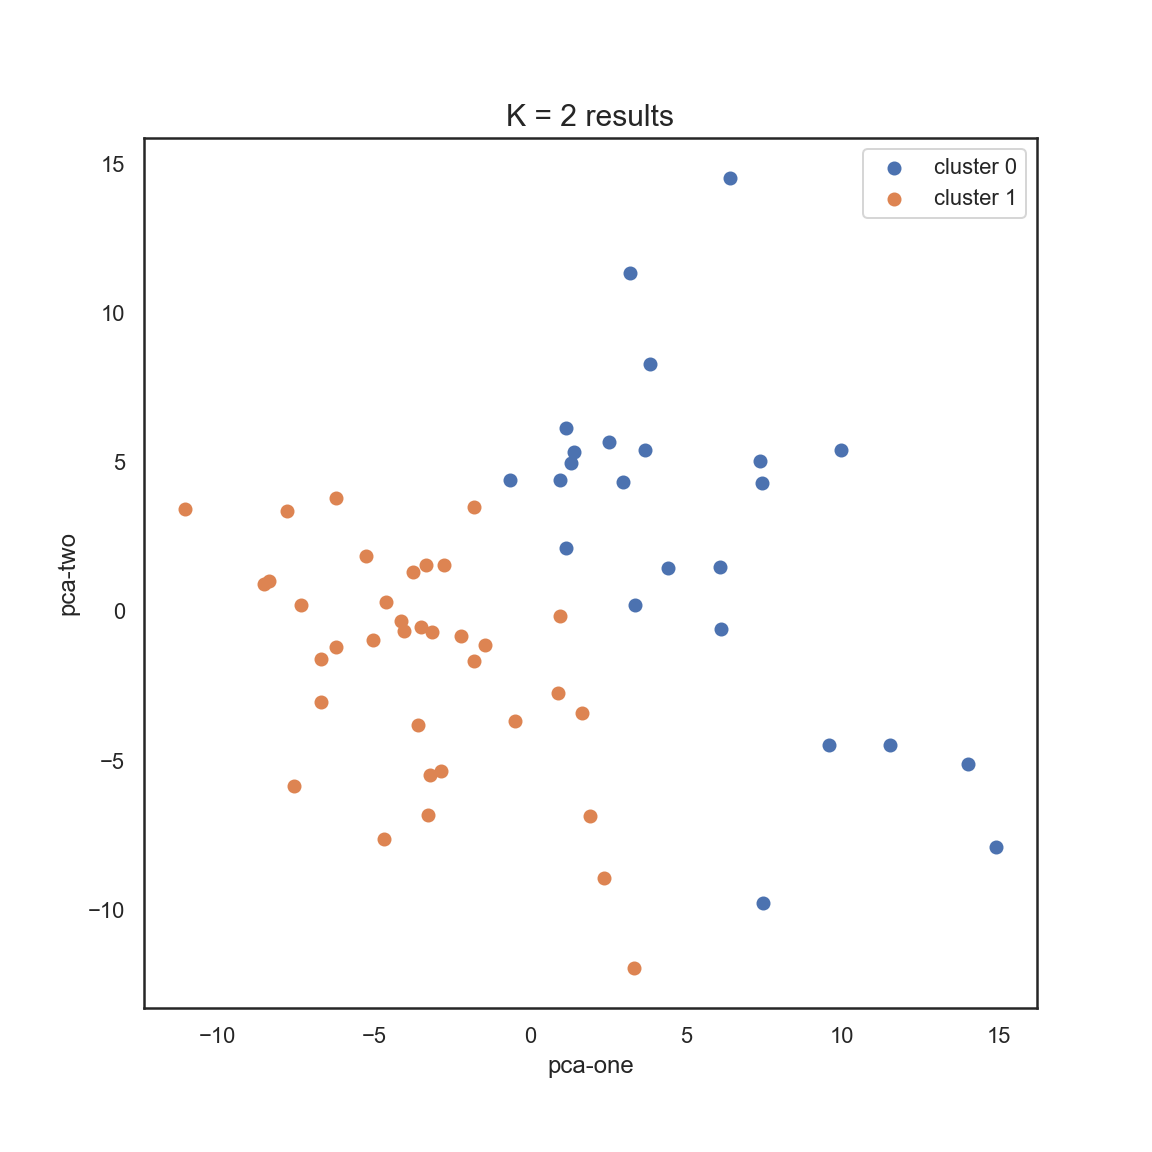

In [502]:
plt.figure(figsize = (8, 8))
k = 2
for i in range(k):
    plt.scatter(df.loc[df['cluster'] == i, 'pca-one'], df.loc[df['cluster'] == i, 'pca-two'], 
                label = 'cluster ' + str(i))
    


plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('pca-one', size = 12)
plt.ylabel('pca-two', size = 12)
plt.show()

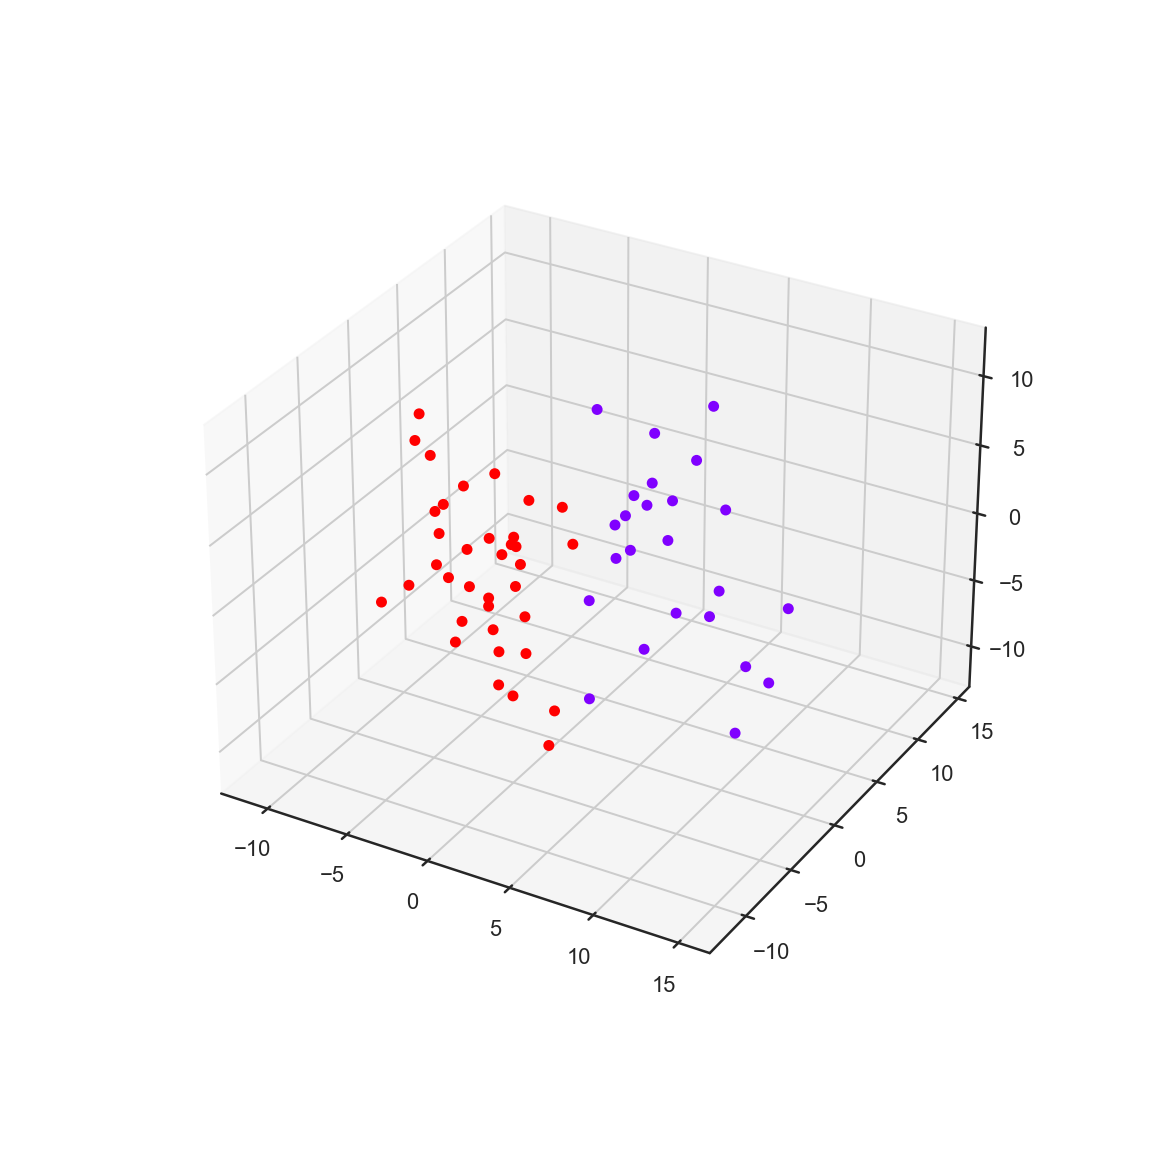

In [491]:
# 3차원으로 시각화하기

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# 데이터 scatterplot
ax.scatter(  df.loc[:,"pca-one"]
           , df.loc[:,"pca-two"]
           , df.loc[:,"pca-three"]
           , c = df['cluster']
           , s = 20
           , cmap = "rainbow"
           , alpha = 1
          )



plt.show()


In [478]:
from sklearn.metrics import accuracy_score, classification_report

In [485]:
acc_score = accuracy_score(y_true=df["label"].astype("int"), y_pred=y_pred)
print(f"Kmeans 클러스터링 결과와 실제 label은 {round(acc_score, 3)}% 만큼 일치합니다")

Kmeans 클러스터링 결과와 실제 label은 0.733% 만큼 일치합니다


In [480]:
print(classification_report(df["label"].astype("int"), y_pred))

              precision    recall  f1-score   support

           0       0.79      0.63      0.70        30
           1       0.69      0.83      0.76        30

    accuracy                           0.73        60
   macro avg       0.74      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



<Axes: >

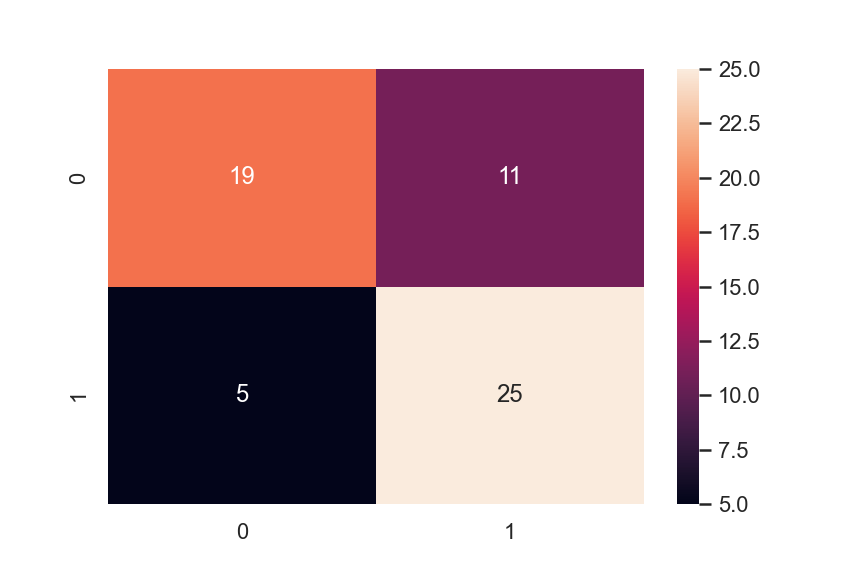

In [482]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(df["label"].astype("int"), y_pred)
sns.heatmap(cm, annot=True)